---
<img src="https://drive.google.com/uc?export=view&id=1HGhzW9yEcMRYy0S88PyzhKcHiizFcNIi" height="450" width="10000"/>

---


# Voice Activity Detection (VAD)

Voice Activity Detection (VAD) is a technique used to determine the presence or absence of human speech in an audio signal. It is a crucial component in speech processing systems, improving the efficiency of applications such as speech recognition, audio compression, and telecommunications.

## Overview
VAD helps in distinguishing between speech and non-speech segments in an audio stream. By identifying the presence of speech, VAD reduces unnecessary processing of non-speech parts, optimizing the performance of speech-related systems.

### Key Features
- Detects speech segments in real-time or batch audio processing.
- Uses energy-based and machine learning techniques for speech classification.
- Works effectively even in noisy environments.

## How VAD Works
VAD algorithms analyze various features of an audio signal to determine the presence of speech:
1. **Energy-Based Methods**: This technique uses the energy levels of the audio signal to detect speech. A high energy value typically indicates speech, while lower energy values correspond to silence or background noise.
2. **Zero-Crossing Rate (ZCR)**: This method counts how often the signal amplitude crosses zero, which can be used to distinguish speech from non-speech segments.
3. **Machine Learning Model**: In some advanced systems, VAD is performed using trained models, such as neural networks, which classify audio segments as speech or non-speech based on learned patterns.

## Applications
- **Speech Recognition**: Focuses the speech recognition process on speech segments, improving performance and accuracy.
- **Telecommunications**: Reduces bandwidth usage by only transmitting segments that contain speech.
- **Audio Compression**: Helps reduce file sizes by ignoring non-speech sections of an audio recording.
- **Hearing Aids**: Improves real-time audio processing for better understanding of speech in noisy environments.

## Setup and Installation

To install and run the VAD system, follow these steps:

1. Clone the repository:

   ```bash
   git clone https://github.com/AyushPoojariUCD/Voice-Activity-Detection.git
   ```

2. Create virtual enviroment

  ```bash
  python -m venv venv
  ```

3. Run streamlit application using command:

  ```bash
  streamlit run app.py
  ```

## 📌 Group Detail
## `Student Name: Ayush Poojari | Student ID: 24214170`
## `Student Name: Sudhanshu Ghughe | Student ID: 24213171`

### Importing Libraries


In [2]:
!pip install librosa
!pip install whisper
!pip install numpy
!pip install scipy
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for whisper: filename=whisper-1.1.10-py3-none-any.whl size=41120 sha256=3c14a622bf1661b73a7fbb39e2869cfa7299464b09141480d08922baa7f94b62
  Stored in directory: /root/.cache/pip/wheels/21/65/ee/4e6672aabfa486d3341a39a04f8f87c77e5156149299b5a7d0
Successfully built whisper


In [49]:
import librosa
import whisper
import numpy as np
import scipy.io.wavfile as wf
import matplotlib.pyplot as plt

### Voice Activity Detection (VAD Utilities)

In [50]:
import numpy as np

def _connect_energy_with_frequencies(data_window, sample_rate=16000):
    fft = np.fft.rfft(data_window)
    freqs = np.fft.rfftfreq(len(data_window), 1/sample_rate)
    power = np.abs(fft) ** 2
    return dict(zip(freqs, power))

def _sum_energy_in_band(energy_dict, start_band=300, end_band=3000):
    return sum(v for k, v in energy_dict.items() if start_band <= k <= end_band)

def _median_filter(x, k):
    assert k % 2 == 1
    assert x.ndim == 1
    k2 = (k - 1) // 2
    y = np.zeros((len(x), k), dtype=x.dtype)
    y[:, k2] = x
    for i in range(k2):
        j = k2 - i
        y[j:, i] = x[:-j]
        y[:j, i] = x[0]
        y[:-j, -(i + 1)] = x[j:]
        y[-j:, -(i + 1)] = x[-1]
    return np.median(y, axis=1)

def _smooth_speech_detection(detected_voice, speech_window=0.5, window=0.02):
    median_window = int(speech_window / window)
    if median_window % 2 == 0:
        median_window -= 1
    detected_voice_array = np.array(detected_voice, dtype=int)
    return _median_filter(detected_voice_array, median_window)

def get_speech_segments(smoothed_voice, window_size=0.02):
    segments = []
    start = None
    for i, val in enumerate(smoothed_voice):
        if val and start is None:
            start = i
        elif not val and start is not None:
            segments.append((start * window_size, i * window_size))
            start = None
    if start is not None:
        segments.append((start * window_size, len(smoothed_voice) * window_size))
    return segments

#### Audio reading files

In [52]:
def read_wav(path):
    rate, data = wf.read(path)
    if len(data.shape) == 2:
        data = data.mean(axis=1)
    data = data.astype(np.float32)
    data /= np.max(np.abs(data))
    return rate, data

In [53]:
!pip install -q gdown

import gdown

# Google Drive shareable link
url = "https://drive.google.com/uc?id=1JSP_Q6IKTjGUYBLzo4Kz4m8VWsLWxWuZ"

# Output filename (optional)
output = "test.wav"

# Download the file
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1JSP_Q6IKTjGUYBLzo4Kz4m8VWsLWxWuZ
To: /content/test.wav
100%|██████████| 336k/336k [00:00<00:00, 4.76MB/s]


'test.wav'

In [54]:
import librosa
import IPython.display as ipd

audio, sr = librosa.load('test.wav', sr=None)

ipd.Audio(audio, rate=sr)

# 🎤 Voice Activity Detection (VAD) with Frequency-Based Method

## 🔍 What is Voice Activity Detection?

**Voice Activity Detection (VAD)** is the process of identifying the presence or absence of human speech in an audio signal. It is widely used in:
- Noise suppression
- Speech recognition systems
- Telecommunication
- Smart assistants

## 📊 Frequency-Based VAD Approach

This technique analyzes the **distribution of energy across different frequency bands** to determine if the current window of audio contains speech. Human speech typically falls within the 300–3400 Hz range.

### ⚙️ How it Works

- The audio is processed in **overlapping windows**.
- Each window is analyzed using the **Fast Fourier Transform (FFT)** to calculate frequency energies.
- The energy in the **"voice band"** is compared to the total energy.
- If the ratio exceeds a defined threshold, the window is marked as speech.

---

## 📌 Parameters

| Parameter          | Description                        |
|--------------------|------------------------------------|
| `SAMPLE_WINDOW`     | Duration of each frame (e.g. 20ms) |
| `SAMPLE_OVERLAP`    | Step size between frames           |
| `THRESHOLD`         | Minimum energy ratio to consider as speech |

---

In [8]:
SAMPLE_WINDOW = 0.02
SAMPLE_OVERLAP = 0.01
THRESHOLD = 0.6

detected_voice_energy = []
sample_start = 0

while sample_start < len(data) - int(SAMPLE_WINDOW * rate):
    start_idx = int(sample_start)
    end_idx = start_idx + int(SAMPLE_WINDOW * rate)
    window = data[start_idx:end_idx]

    freq_energy = _connect_energy_with_frequencies(window, rate)
    total_energy = sum(freq_energy.values())
    voice_energy = _sum_energy_in_band(freq_energy)

    ratio = voice_energy / total_energy if total_energy > 0 else 0
    detected_voice_energy.append(ratio > THRESHOLD)

    sample_start += SAMPLE_OVERLAP * rate

smoothed = _smooth_speech_detection(detected_voice_energy, window=SAMPLE_WINDOW)
segments = get_speech_segments(smoothed, window_size=SAMPLE_WINDOW)

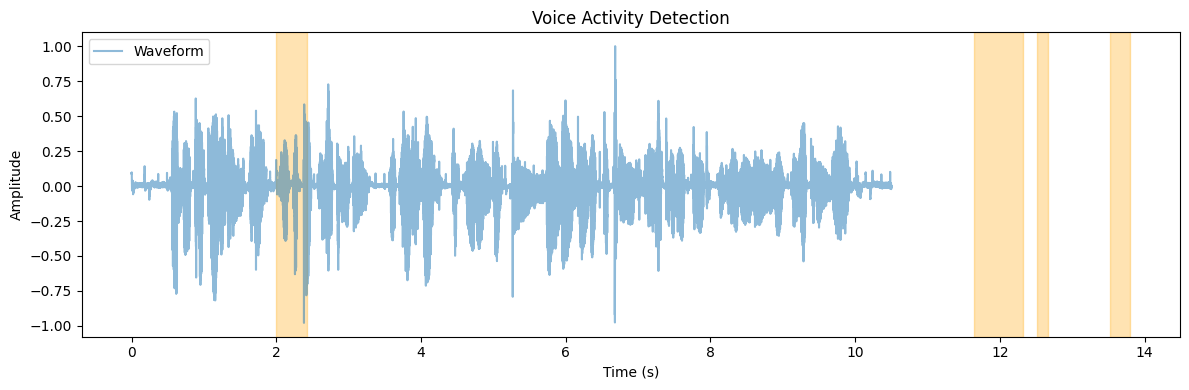

In [9]:
time = np.arange(len(data)) / rate
plt.figure(figsize=(12, 4))
plt.plot(time, data, alpha=0.5, label="Waveform")
for s, e in segments:
    plt.axvspan(s, e, color='orange', alpha=0.3)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Voice Activity Detection")
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
# Print Detected Segments
print("\nDetected Speech Segments:")
for i, (s, e) in enumerate(segments):
    print(f"Segment {i+1}: {s:.2f}s - {e:.2f}s")


Detected Speech Segments:
Segment 1: 2.00s - 2.42s
Segment 2: 11.64s - 12.32s
Segment 3: 12.52s - 12.66s
Segment 4: 13.52s - 13.80s


# 🔋 Energy-Based Voice Activity Detection (VAD)

## 📌 Overview

**Energy-based VAD** is one of the simplest yet effective approaches to detect speech in audio signals. It works by:
- Splitting audio into frames
- Calculating energy in each frame
- Applying a threshold to decide if speech is present

This method is useful for clean recordings and real-time applications where low computational cost is important.

---

## 🧠 Algorithm

1. Divide audio into fixed-size frames (e.g., 25ms).
2. Compute energy of each frame using:
   \[
   \text{Energy} = \sum x^2
   \]
3. If the energy exceeds a threshold, classify the frame as speech.

---

## ⚙️ Parameters

| Parameter        | Description                          |
|------------------|--------------------------------------|
| `window_duration` | Frame length (e.g., 0.025 sec)       |
| `threshold`       | Minimum energy required to flag speech |

---

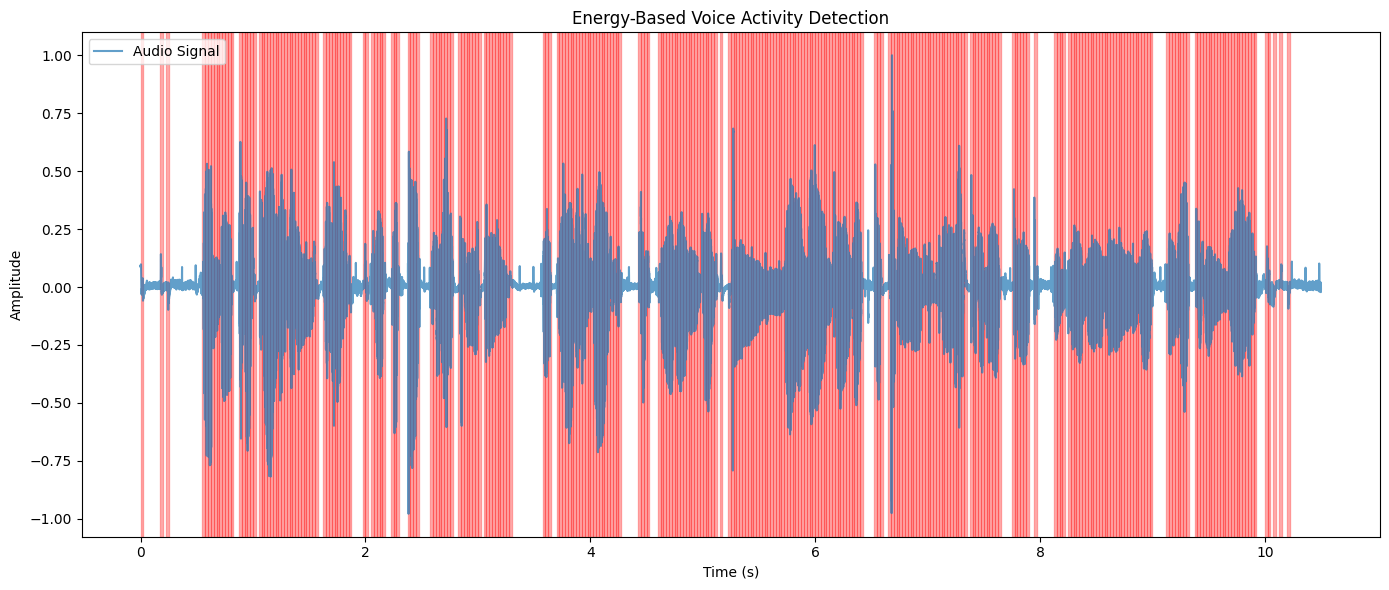

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def energy_vad(audio, rate, window_duration=0.025, threshold=0.01):
    frame_length = int(rate * window_duration)  # Frame size in samples
    num_frames = int(np.ceil(len(audio) / frame_length))

    vad_result = []

    for i in range(num_frames):
        start = i * frame_length
        end = start + frame_length
        frame = audio[start:end]
        energy = np.sum(frame**2)
        vad_result.append(1 if energy > threshold else 0)

    return vad_result

rate, audio = wavfile.read('test.wav')

if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1)

audio = audio / np.max(np.abs(audio))

# --- Run VAD ---
window_duration = 0.025  # 25ms
threshold = 0.4
vad_result = energy_vad(audio, rate, window_duration, threshold)

times = np.arange(len(audio)) / rate
frame_length = int(rate * window_duration)

plt.figure(figsize=(14, 6))
plt.plot(times, audio, label="Audio Signal", alpha=0.7)

for i, flag in enumerate(vad_result):
    if flag:
        start_time = i * window_duration
        end_time = (i + 1) * window_duration
        plt.axvspan(start_time, end_time, color='red', alpha=0.3)

plt.title("Energy-Based Voice Activity Detection")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()

# 🔄 ZCR-Based Voice Activity Detection (VAD)

## 📌 Overview

**Zero-Crossing Rate (ZCR)** is a simple method for detecting the presence of speech in audio by counting the number of times the signal crosses the zero amplitude axis.

ZCR is particularly useful in distinguishing **voiced** from **unvoiced** sounds or **speech** from **silence**.

---

## 🧠 Algorithm

1. Divide the audio into short overlapping frames.
2. Count the number of times the signal changes sign within each frame.
3. Compare the ZCR value against a threshold.
4. If ZCR exceeds the threshold, classify the frame as **speech**.

---

## ⚙️ Parameters

| Parameter        | Description                                |
|------------------|--------------------------------------------|
| `window_duration` | Frame duration (e.g., 0.025 seconds)       |
| `threshold`       | ZCR threshold (e.g., 0.1–0.4)               |

---

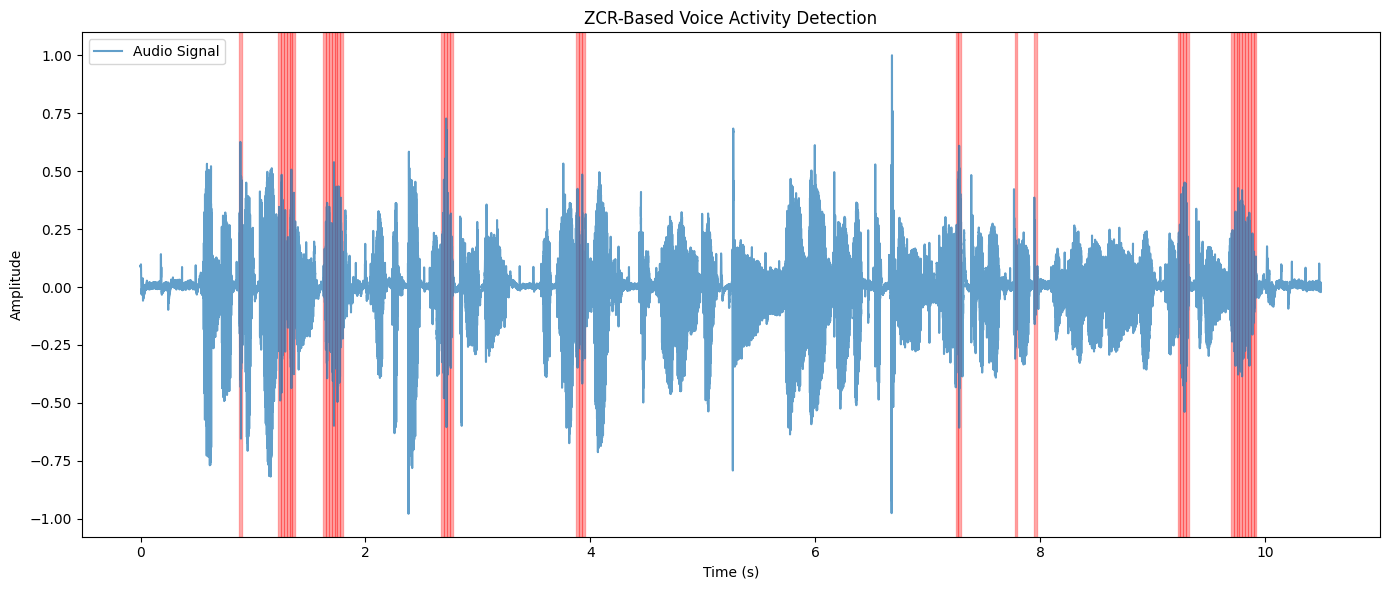

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# --- ZCR-based Voice Activity Detection ---
def zcr_vad(audio, rate, window_duration=0.025, threshold=0.02):
    frame_length = int(rate * window_duration)
    num_frames = int(np.ceil(len(audio) / frame_length))

    vad_result = []

    for i in range(num_frames):
        start = i * frame_length
        end = start + frame_length
        frame = audio[start:end]
        if len(frame) == 0:
            continue
        zcr = np.sum(np.abs(np.diff(np.sign(frame)))) / (2 * len(frame))
        vad_result.append(1 if zcr > threshold else 0)

    return vad_result

rate, audio = wavfile.read('test.wav')  # Replace with your .wav file

if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1)

audio = audio / np.max(np.abs(audio))

window_duration = 0.025
threshold = 0.4
vad_result = zcr_vad(audio, rate, window_duration, threshold)

# --- Plot ---
times = np.arange(len(audio)) / rate
frame_length = int(rate * window_duration)

plt.figure(figsize=(14, 6))
plt.plot(times, audio, label="Audio Signal", alpha=0.7)

for i, flag in enumerate(vad_result):
    if flag:
        start_time = i * window_duration
        end_time = (i + 1) * window_duration
        plt.axvspan(start_time, end_time, color='red', alpha=0.3)

plt.title("ZCR-Based Voice Activity Detection")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()

# 🔊 Spectral Entropy-Based Voice Activity Detection (VAD)

## 📌 Overview

**Spectral Entropy** measures the disorder or unpredictability in the frequency spectrum of an audio signal.
Speech tends to have a more structured frequency spectrum, while noise or silence is more random.  
This makes spectral entropy a powerful metric for **voice activity detection**.

---

## 🧠 Algorithm Steps

1. Split audio into short overlapping frames.
2. Compute the **Power Spectral Density (PSD)** of each frame.
3. Normalize PSD to a probability distribution.
4. Calculate **entropy** of the distribution.
5. Compare entropy to a threshold to detect speech.

---

## ⚙️ Parameters

| Parameter          | Description                                 |
|--------------------|---------------------------------------------|
| `window_duration`  | Frame size (e.g., 25 ms)                    |
| `threshold`        | Entropy threshold (e.g., 0.7)               |

---

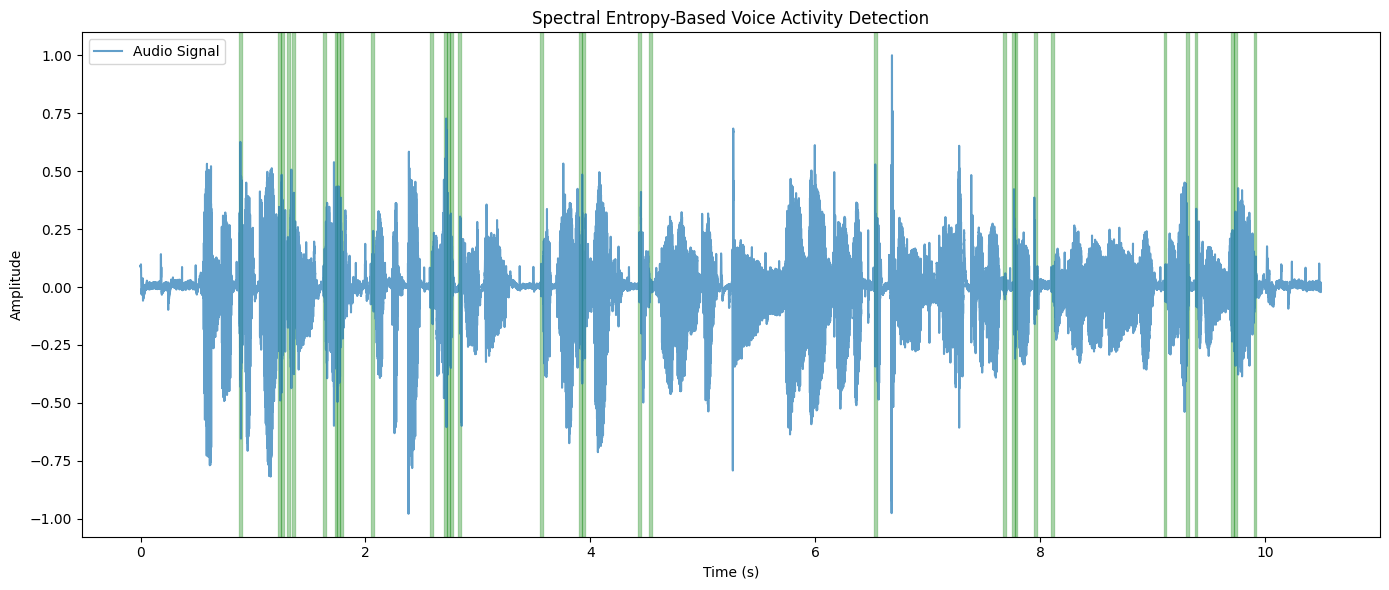

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import get_window
from scipy.fft import fft

# --- Spectral Entropy Calculation ---
def spectral_entropy(frame, eps=1e-8):
    spectrum = np.abs(fft(frame))[:len(frame)//2]
    psd = spectrum ** 2
    psd_norm = psd / (np.sum(psd) + eps)
    entropy = -np.sum(psd_norm * np.log2(psd_norm + eps))
    return entropy / np.log2(len(psd_norm))  # Normalize to [0,1]

# --- Spectral Entropy VAD Function ---
def entropy_vad(audio, rate, window_duration=0.025, threshold=0.5):
    frame_length = int(rate * window_duration)
    num_frames = int(np.ceil(len(audio) / frame_length))
    window = get_window('hann', frame_length, fftbins=True)

    vad_result = []

    for i in range(num_frames):
        start = i * frame_length
        end = start + frame_length
        frame = audio[start:end]
        if len(frame) < frame_length:
            frame = np.pad(frame, (0, frame_length - len(frame)))
        frame = frame * window
        entropy = spectral_entropy(frame)
        vad_result.append(1 if entropy > threshold else 0)

    return vad_result

# --- Load and Preprocess Audio ---
rate, audio = wavfile.read('test.wav')

if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1)

audio = audio / np.max(np.abs(audio))

# --- Run VAD ---
window_duration = 0.025
threshold = 0.7  # Adjust based on dataset
vad_result = entropy_vad(audio, rate, window_duration, threshold)

# --- Plot ---
times = np.arange(len(audio)) / rate

plt.figure(figsize=(14, 6))
plt.plot(times, audio, label="Audio Signal", alpha=0.7)

for i, flag in enumerate(vad_result):
    if flag:
        start_time = i * window_duration
        end_time = (i + 1) * window_duration
        plt.axvspan(start_time, end_time, color='green', alpha=0.3)

plt.title("Spectral Entropy-Based Voice Activity Detection")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()


# 🔊 **Google's WebRTC Voice Activity Detection (VAD)**

## 📌 **Overview**

**WebRTC VAD** is a popular, lightweight, and real-time **voice activity detection** algorithm used in **Google’s Web Real-Time Communication** stack.

It analyzes **short PCM audio frames** and detects whether they contain human speech or not. It is designed for **low-latency applications** like voice calling and video conferencing.

---

## ⚙️ **Key Features**

- Operates on **10, 20, or 30 ms** mono PCM frames.
- Requires **16-bit linear PCM audio** at **8, 16, 32, or 48 kHz**.
- Offers **4 aggressiveness modes** (0 = least, 3 = most aggressive).

---

In [14]:
!pip install webrtcvad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp311-cp311-linux_x86_64.whl size=73497 sha256=e0ca63be646267ab9cd8f7b721ea6b7f3f3a0dccd7a8bb90a12ac3156cd2688d
  Stored in directory: /root/.cache/pip/wheels/94/65/3f/292d0b656be33d1c801831201c74b5f68f41a2ae465ff2ee2f
Successfully built webrtcvad


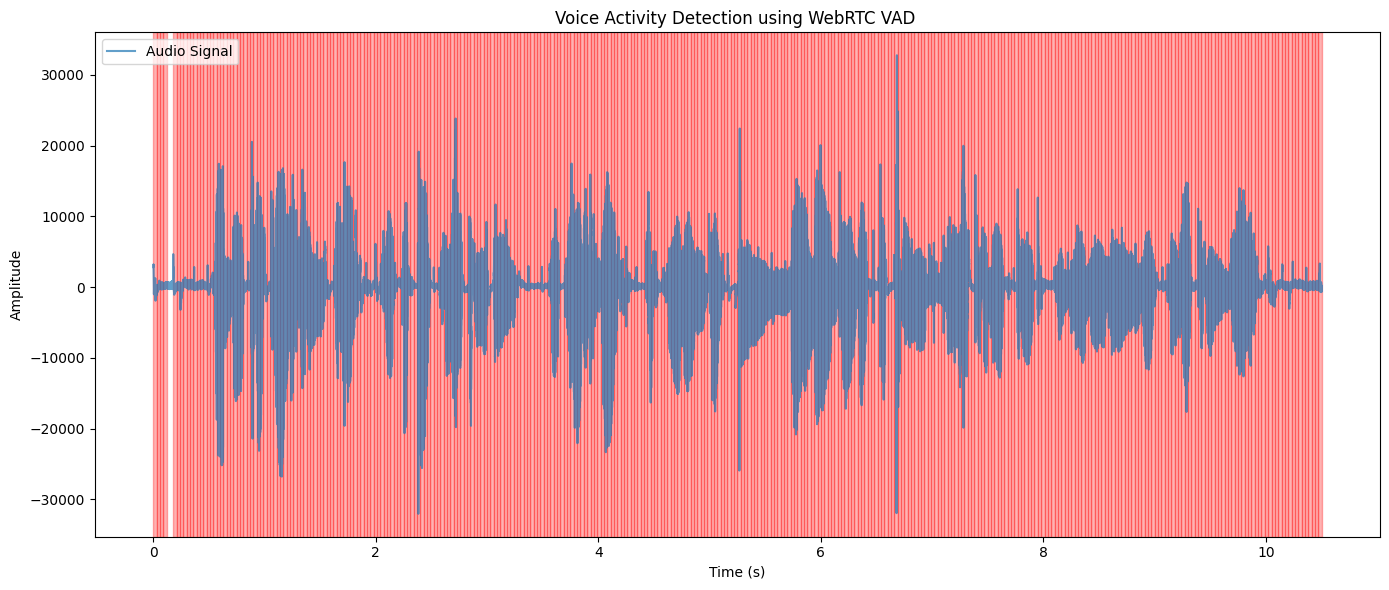

In [15]:
import webrtcvad
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load audio (must be mono, 16-bit PCM, 16kHz)
rate, audio = wavfile.read('test.wav')
if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1).astype(np.int16)

# Normalize to int16 range
audio = (audio / np.max(np.abs(audio)) * 32767).astype(np.int16)

# Initialize VAD with aggressiveness level
vad = webrtcvad.Vad(0)

frame_duration = 30  # in ms
frame_length = int(rate * frame_duration / 1000)
frames = [audio[i:i+frame_length] for i in range(0, len(audio), frame_length)]

# Run VAD
vad_flags = [vad.is_speech(frame.tobytes(), rate) for frame in frames if len(frame) == frame_length]

# Create time axis for plotting
times = np.arange(len(audio)) / rate

# Plotting the audio signal
plt.figure(figsize=(14, 6))
plt.plot(times, audio, label="Audio Signal", alpha=0.7)

# Plot speech regions (where VAD flag is 1)
for i, flag in enumerate(vad_flags):
    if flag:
        start_time = i * frame_duration / 1000
        end_time = (i + 1) * frame_duration / 1000
        plt.axvspan(start_time, end_time, color='red', alpha=0.3)

plt.title("Voice Activity Detection using WebRTC VAD ")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()

---
### Voice Activity Detection using **Silero VAD**

Silero VAD is a **deep learning-based voice activity detection** model trained to detect **speech segments** in audio, including short utterances or long conversations. It's lightweight, fast, and can be used **offline**.

---

#### 📌 Key Features

- Works well on noisy audio and a variety of accents/languages.
- Supports **offline inference** using PyTorch.
- Returns **timestamps** (start/end) of detected speech.

---

#### ⚙️ Installation

```bash
pip install torch torchaudio
```
---

In [16]:
!pip install torch torchaudio silero

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.1 MB/s eta 0:00:00
 

In [17]:
!pip install torch torchaudio matplotlib

Downloading: "https://github.com/snakers4/silero-vad/zipball/master" to /root/.cache/torch/hub/master.zip


Detected speech segments: [{'start': 8224, 'end': 31200}, {'start': 32800, 'end': 161760}]


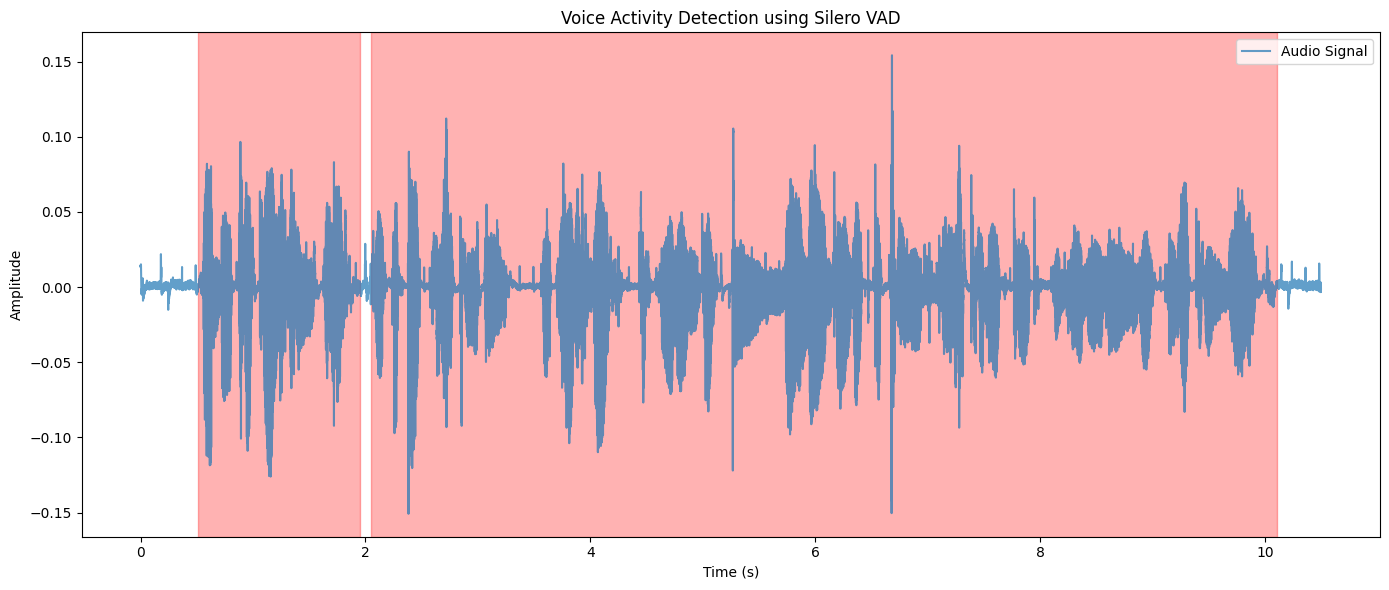

In [18]:
import torch
import torchaudio
import matplotlib.pyplot as plt

# Load the Silero VAD model from Torch Hub
model, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad', model='silero_vad', trust_repo=True)
get_speech_timestamps = utils[0]  # Extracting only the function we need

# Load the audio file
wav, sr = torchaudio.load('test.wav')

# Get speech timestamps
vad_segments = get_speech_timestamps(wav, model, sampling_rate=sr)
print("Detected speech segments:", vad_segments)

# Create time axis for plotting
times = torch.arange(0, wav.shape[1]) / sr

# Plot the audio waveform
plt.figure(figsize=(14, 6))
plt.plot(times.numpy(), wav[0].numpy(), label="Audio Signal", alpha=0.7)

# Plot speech segments
for segment in vad_segments:
    start_time = segment['start'] / sr
    end_time = segment['end'] / sr
    plt.axvspan(start_time, end_time, color='red', alpha=0.3)

plt.title("Voice Activity Detection using Silero VAD")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()

# 🛠️ Custom Voice Activity Detection (VAD) Model

This custom VAD system uses a **Random Forest classifier** trained on MFCC features extracted from Google's Speech Commands Dataset. It is designed to differentiate between **speech** (e.g., “yes”, “no”) and **non-speech** (e.g., background noise).

---

## 📂 Dataset

- **Source**: [Google Speech Commands v0.02](http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz)
- **Classes Used**:
  - `yes`, `no` → **Speech**
  - `_background_noise_` → **Non-speech**
- **Preprocessing**:
  - 500 samples each from `yes` and `no`
  - 1-second chunks from `_background_noise_` WAV files

---

## 🔍 Feature Extraction

We use **MFCCs** as features:

```python
mfcc = librosa.feature.mfcc(y=audio, sr=16000, n_mfcc=13)
mfcc_scaled = np.mean(mfcc.T, axis=0)
```

In [56]:
import os
import zipfile
import requests
import librosa
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

# Create data directory
os.makedirs("data", exist_ok=True)

# -----------------------------
# 1. Download Google Speech Commands subset (2 classes + background)
# -----------------------------
DATASET_URL = "http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz"
DATASET_PATH = "data/speech_commands_v0.02.tar.gz"

if not os.path.exists(DATASET_PATH):
    print("Downloading dataset...")
    with requests.get(DATASET_URL, stream=True) as r:
        with open(DATASET_PATH, 'wb') as f:
            for chunk in tqdm(r.iter_content(chunk_size=8192)):
                f.write(chunk)

# Extract only 'yes', 'no' and _background_noise_
import tarfile
if not os.path.exists("data/speech_commands"):
    print("Extracting dataset...")
    with tarfile.open(DATASET_PATH, "r:gz") as tar:
        members = [m for m in tar.getmembers() if "yes/" in m.name or "no/" in m.name or "_background_noise_/" in m.name]
        tar.extractall(path="data/speech_commands", members=members)

# -----------------------------
# 2. Feature Extraction (MFCCs)
# -----------------------------
def extract_features(file_path, label):
    try:
        y, sr = librosa.load(file_path, sr=16000)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_scaled = np.mean(mfcc.T, axis=0)
        return mfcc_scaled, label
    except:
        return None, None

features = []
labels = []

speech_classes = ['yes', 'no']
base_path = "data/speech_commands"

# Speech samples
print("Extracting speech features...")
for cls in speech_classes:
    folder = os.path.join(base_path, cls)
    for fname in os.listdir(folder)[:500]:  # limit to 500 samples/class
        fpath = os.path.join(folder, fname)
        feat, lbl = extract_features(fpath, 1)
        if feat is not None:
            features.append(feat)
            labels.append(lbl)

# Non-speech samples (background noise split into chunks)
print("Extracting non-speech features...")
bg_folder = os.path.join(base_path, "_background_noise_")
for fname in os.listdir(bg_folder):
    if fname.endswith(".wav"):
        y, sr = librosa.load(os.path.join(bg_folder, fname), sr=16000)
        for i in range(0, len(y)-16000, 16000):  # 1-second chunks
            chunk = y[i:i+16000]
            mfcc = librosa.feature.mfcc(y=chunk, sr=sr, n_mfcc=13)
            mfcc_scaled = np.mean(mfcc.T, axis=0)
            features.append(mfcc_scaled)
            labels.append(0)

# -----------------------------
# 3. Model Training
# -----------------------------
print("Training model...")
X = np.array(features)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# 4. Evaluation
# -----------------------------
print("Evaluating model...")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Non-speech", "Speech"]))

# -----------------------------
# 5. Save Model
# -----------------------------
import joblib
joblib.dump(model, "vad_model.pkl")
print("Model saved as vad_model.pkl")

Extracting speech features...
Extracting non-speech features...
Training model...
Evaluating model...
              precision    recall  f1-score   support

  Non-speech       0.99      0.99      0.99        79
      Speech       1.00      1.00      1.00       201

    accuracy                           0.99       280
   macro avg       0.99      0.99      0.99       280
weighted avg       0.99      0.99      0.99       280

Model saved as vad_model.pkl


---

### 🎯 Ground Truth Values of Voice Detection in Uploaded Audio File

To evaluate the performance of various Voice Activity Detection (VAD) models, we first establish the **ground truth speech segments** manually or using a high-confidence VAD (like WebRTC with high aggressiveness).

These segments represent the true regions of speech in the uploaded file, annotated in terms of **start and end times (in milliseconds)**.

---

In [57]:
import wave
import webrtcvad
import collections
import sys

def generate_voice_segments(wav_file_path, aggressiveness=3, frame_duration_ms=30):
    """
    Generate ground truth segments where voice is detected in a .wav file.

    Args:
        wav_file_path (str): Path to the .wav file.
        aggressiveness (int): VAD aggressiveness (0-3). Higher is more aggressive.
        frame_duration_ms (int): Duration of each audio frame in milliseconds (10, 20, or 30).

    Returns:
        list: List of tuples (start_time_ms, end_time_ms) where voice is detected.
    """
    # Validate frame duration
    if frame_duration_ms not in [10, 20, 30]:
        raise ValueError("frame_duration_ms must be 10, 20, or 30")

    # Initialize VAD
    vad = webrtcvad.Vad(aggressiveness)

    # Read the .wav file
    with wave.open(wav_file_path, 'rb') as wf:
        sample_rate = wf.getframerate()
        n_channels = wf.getnchannels()
        sample_width = wf.getsampwidth()
        pcm_data = wf.readframes(wf.getnframes())

    # Validate audio format (webrtcvad requires 16-bit mono PCM)
    if sample_width != 2:
        raise ValueError("Sample width must be 2 (16-bit PCM)")
    if n_channels != 1:
        raise ValueError("Audio must be mono")

    # Calculate frame size in bytes
    frame_size_bytes = (sample_rate * frame_duration_ms * sample_width) // 1000

    # Split audio into frames
    frames = [
        pcm_data[i * frame_size_bytes : (i + 1) * frame_size_bytes]
        for i in range(len(pcm_data) // frame_size_bytes)
    ]

    # Convert frame times to milliseconds
    voice_segments = []
    voice_active = False
    start_time = 0

    for i, frame in enumerate(frames):
        time_ms = i * frame_duration_ms
        is_speech = vad.is_speech(frame, sample_rate)

        if is_speech and not voice_active:
            # Voice activity starts
            voice_active = True
            start_time = time_ms
        elif not is_speech and voice_active:
            # Voice activity ends
            voice_active = False
            end_time = time_ms
            voice_segments.append((start_time, end_time))

    # Add the last segment if voice is active at the end
    if voice_active:
        voice_segments.append((start_time, len(frames) * frame_duration_ms))

    return voice_segments


if __name__ == "__main__":
    wav_file = "test.wav"
    ground_truth = generate_voice_segments(wav_file)
    print("Ground truth voice segments (ms):", ground_truth)

Ground truth voice segments (ms): [(0, 90), (570, 1350), (1380, 1620), (1680, 1770), (1800, 1920), (2100, 2220), (2250, 2550), (2580, 2760), (2850, 3360), (3570, 4320), (4440, 4590), (4620, 5190), (5250, 6510), (6540, 7320), (7380, 7740), (7770, 8040), (8130, 9090), (9150, 9300), (9390, 9780), (10020, 10110)]


In [58]:
import numpy as np
import webrtcvad
import torch
import torchaudio
from scipy.io import wavfile
from scipy.signal import get_window
from scipy.fft import fft

def get_all_vad_predictions(wav_file_path):
    """
    Get voice activity detection predictions from all methods in ground truth format.

    Args:
        wav_file_path (str): Path to the .wav file

    Returns:
        dict: {
            'webrtc': [(start1, end1), (start2, end2), ...],
            'silero': [(start1, end1), (start2, end2), ...],
            'entropy': [(start1, end1), (start2, end2), ...],
            'zcr': [(start1, end1), (start2, end2), ...],
            'energy': [(start1, end1), (start2, end2), ...]
        }
    """
    # --- Load and Preprocess Audio ---
    rate, audio = wavfile.read(wav_file_path)
    if len(audio.shape) > 1:
        audio = np.mean(audio, axis=1)
    audio = audio / np.max(np.abs(audio))

    # Convert to 16-bit PCM for WebRTC VAD
    audio_16bit = (audio * 32767).astype(np.int16)

    # ========================
    # WebRTC VAD Predictions
    # ========================
    def webrtc_vad_segments(audio, rate, frame_duration=30):
        frame_length = int(rate * frame_duration / 1000)
        frames = [audio[i:i+frame_length] for i in range(0, len(audio), frame_length)]
        vad = webrtcvad.Vad(2)  # Medium aggressiveness

        segments = []
        current_start = None

        for i, frame in enumerate(frames):
            if len(frame) != frame_length:
                continue

            is_speech = vad.is_speech(frame.tobytes(), rate)
            time = i * frame_duration / 1000  # Convert to seconds

            if is_speech and current_start is None:
                current_start = time
            elif not is_speech and current_start is not None:
                segments.append((current_start, time))
                current_start = None

        if current_start is not None:
            segments.append((current_start, len(frames) * frame_duration / 1000))

        return segments

    # ========================
    # Silero VAD Predictions
    # ========================
    def silero_vad_segments(wav_file_path):
        model, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad',
                                     model='silero_vad',
                                     trust_repo=True)
        get_speech_timestamps = utils[0]

        wav_tensor, sr = torchaudio.load(wav_file_path)
        silero_segments = get_speech_timestamps(wav_tensor, model, sampling_rate=sr)

        return [(seg['start']/sr, seg['end']/sr) for seg in silero_segments]

    # ========================
    # Spectral Entropy VAD
    # ========================
    def spectral_entropy(frame, eps=1e-8):
        spectrum = np.abs(fft(frame))[:len(frame)//2]
        psd = spectrum ** 2
        psd_norm = psd / (np.sum(psd) + eps)
        entropy = -np.sum(psd_norm * np.log2(psd_norm + eps))
        return entropy / np.log2(len(psd_norm))

    def entropy_vad_segments(audio, rate, window_duration=0.025, threshold=0.7):
        frame_length = int(rate * window_duration)
        num_frames = int(np.ceil(len(audio) / frame_length))
        window = get_window('hann', frame_length, fftbins=True)

        segments = []
        current_start = None

        for i in range(num_frames):
            start = i * frame_length
            end = start + frame_length
            frame = audio[start:end]
            if len(frame) < frame_length:
                frame = np.pad(frame, (0, frame_length - len(frame)))
            frame = frame * window
            entropy = spectral_entropy(frame)

            time = i * window_duration
            if entropy > threshold and current_start is None:
                current_start = time
            elif entropy <= threshold and current_start is not None:
                segments.append((current_start, time))
                current_start = None

        if current_start is not None:
            segments.append((current_start, num_frames * window_duration))

        return segments

    # ========================
    # ZCR VAD
    # ========================
    def zcr_vad_segments(audio, rate, window_duration=0.025, threshold=0.4):
        frame_length = int(rate * window_duration)
        num_frames = int(np.ceil(len(audio) / frame_length))

        segments = []
        current_start = None

        for i in range(num_frames):
            start = i * frame_length
            end = start + frame_length
            frame = audio[start:end]
            if len(frame) == 0:
                continue
            zcr = np.sum(np.abs(np.diff(np.sign(frame)))) / (2 * len(frame))

            time = i * window_duration
            if zcr > threshold and current_start is None:
                current_start = time
            elif zcr <= threshold and current_start is not None:
                segments.append((current_start, time))
                current_start = None

        if current_start is not None:
            segments.append((current_start, num_frames * window_duration))

        return segments

    # ========================
    # Energy VAD
    # ========================
    def energy_vad_segments(audio, rate, window_duration=0.025, threshold=0.4):
        frame_length = int(rate * window_duration)
        num_frames = int(np.ceil(len(audio) / frame_length))

        segments = []
        current_start = None

        for i in range(num_frames):
            start = i * frame_length
            end = start + frame_length
            frame = audio[start:end]
            energy = np.sum(frame**2)

            time = i * window_duration
            if energy > threshold and current_start is None:
                current_start = time
            elif energy <= threshold and current_start is not None:
                segments.append((current_start, time))
                current_start = None

        if current_start is not None:
            segments.append((current_start, num_frames * window_duration))

        return segments

    # Run all VAD methods
    return {
        'webrtc': webrtc_vad_segments(audio_16bit, rate),
        'silero': silero_vad_segments(wav_file_path),
        'entropy': entropy_vad_segments(audio, rate),
        'zcr': zcr_vad_segments(audio, rate),
        'energy': energy_vad_segments(audio, rate)
    }

if __name__ == "__main__":
    predictions = get_all_vad_predictions("test.wav")
    for method, segments in predictions.items():
        print(f"{method.upper()} VAD segments:")
        for start, end in segments:
            print(f"  {start:.3f}s - {end:.3f}s")
        print()

Using cache found in /root/.cache/torch/hub/snakers4_silero-vad_master


WEBRTC VAD segments:
  0.000s - 0.090s
  0.180s - 0.330s
  0.360s - 0.450s
  0.480s - 2.550s
  2.580s - 3.450s
  3.540s - 4.350s
  4.410s - 8.070s
  8.100s - 9.990s
  10.020s - 10.320s
  10.470s - 10.500s

SILERO VAD segments:
  0.514s - 1.950s
  2.050s - 10.110s

ENTROPY VAD segments:
  0.875s - 0.900s
  1.225s - 1.275s
  1.300s - 1.325s
  1.350s - 1.375s
  1.625s - 1.650s
  1.725s - 1.800s
  2.050s - 2.075s
  2.575s - 2.600s
  2.700s - 2.775s
  2.825s - 2.850s
  3.550s - 3.575s
  3.900s - 3.950s
  4.425s - 4.450s
  4.525s - 4.550s
  6.525s - 6.550s
  7.675s - 7.700s
  7.750s - 7.800s
  7.950s - 7.975s
  8.100s - 8.125s
  9.100s - 9.125s
  9.300s - 9.325s
  9.375s - 9.400s
  9.700s - 9.750s
  9.900s - 9.925s

ZCR VAD segments:
  0.875s - 0.900s
  1.225s - 1.375s
  1.625s - 1.800s
  2.675s - 2.775s
  3.875s - 3.950s
  7.250s - 7.300s
  7.775s - 7.800s
  7.950s - 7.975s
  9.225s - 9.325s
  9.700s - 9.925s

ENERGY VAD segments:
  0.000s - 0.025s
  0.175s - 0.200s
  0.225s - 0.250s
  0.55

---
### Comparing Voice Detection Models

---

Using cache found in /root/.cache/torch/hub/snakers4_silero-vad_master
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=400
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=400
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=400
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=400
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=400
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=400
  warnings.warn(

Evaluation Metrics:
WEBRTC        | F1: 0.901 | Precision: 0.819 | Recall: 1.000
   Detected Duration: 9.96s / Truth: 8.16s
SILERO        | F1: 0.913 | Precision: 0.848 | Recall: 0.989
   Detected Duration: 9.50s / Truth: 8.16s
ENTROPY       | F1: 0.109 | Precision: 0.598 | Recall: 0.060
   Detected Duration: 0.80s / Truth: 8.16s
ZCR           | F1: 0.149 | Precision: 0.701 | Recall: 0.083
   Detected Duration: 0.95s / Truth: 8.16s
ENERGY        | F1: 0.831 | Precision: 0.935 | Recall: 0.747
   Detected Duration: 6.52s / Truth: 8.16s
CUSTOM_MODEL  | F1: 0.856 | Precision: 0.776 | Recall: 0.955
   Detected Duration: 10.02s / Truth: 8.16s


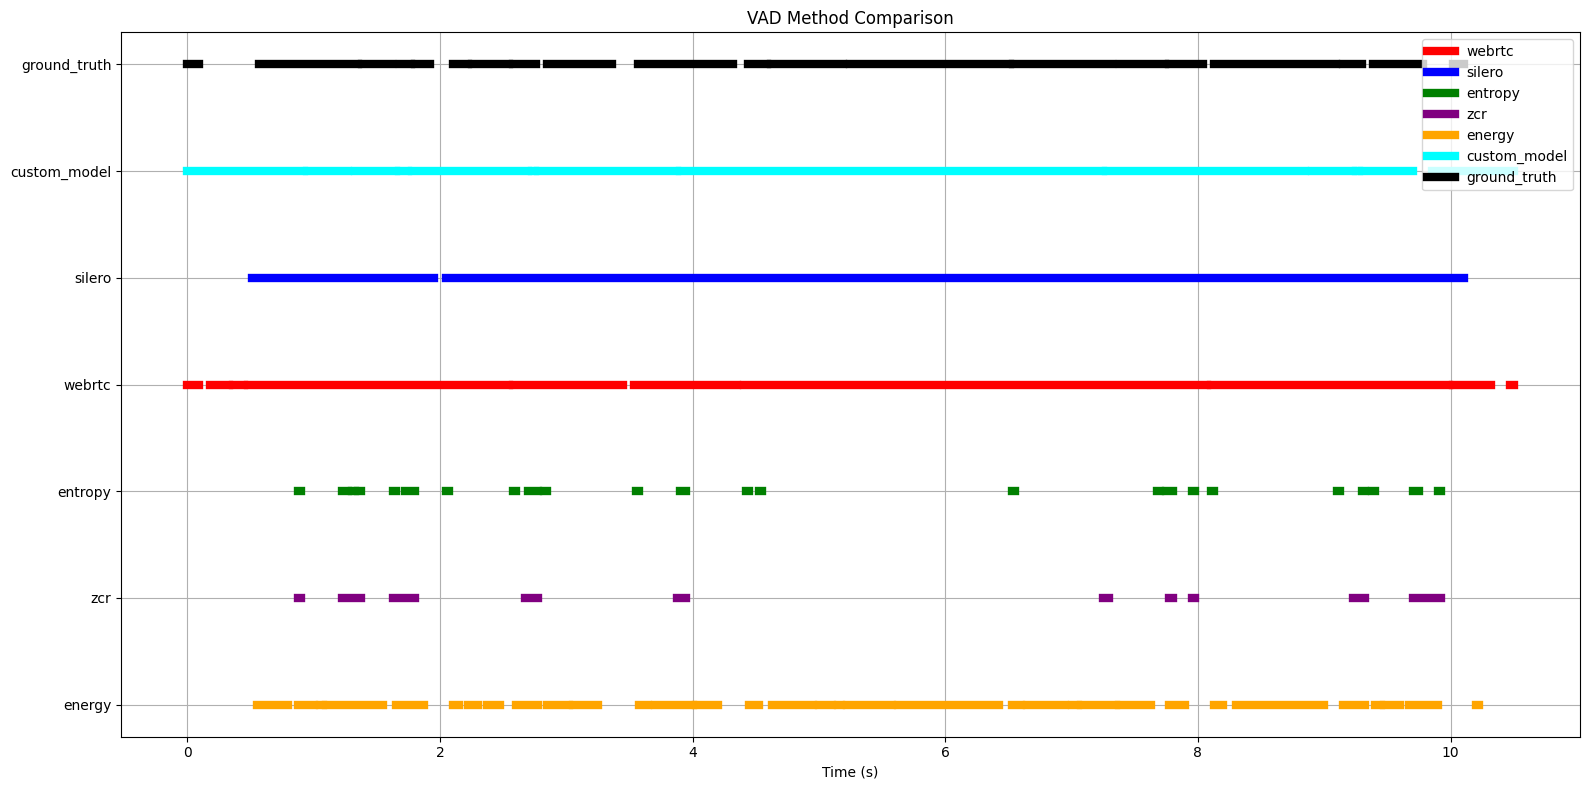

In [59]:
import numpy as np
import wave
import webrtcvad
import torch
import torchaudio
import librosa
import joblib
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import get_window
from scipy.fft import fft
from collections import defaultdict

def generate_voice_segments(wav_file_path, aggressiveness=3, frame_duration_ms=30):
    vad = webrtcvad.Vad(aggressiveness)
    with wave.open(wav_file_path, 'rb') as wf:
        sample_rate = wf.getframerate()
        n_channels = wf.getnchannels()
        sample_width = wf.getsampwidth()
        pcm_data = wf.readframes(wf.getnframes())

    if sample_width != 2 or n_channels != 1:
        raise ValueError("Audio must be 16-bit PCM mono.")

    frame_size = (sample_rate * frame_duration_ms * sample_width) // 1000
    frames = [pcm_data[i:i+frame_size] for i in range(0, len(pcm_data), frame_size)]

    segments = []
    voice_active = False
    for i, frame in enumerate(frames):
        time_ms = i * frame_duration_ms
        is_speech = vad.is_speech(frame, sample_rate)
        if is_speech and not voice_active:
            voice_active = True
            start_time = time_ms
        elif not is_speech and voice_active:
            voice_active = False
            end_time = time_ms
            segments.append((start_time, end_time))
    if voice_active:
        segments.append((start_time, len(frames) * frame_duration_ms))
    return segments

def get_all_vad_predictions(wav_file_path):
    rate, audio = wavfile.read(wav_file_path)
    if len(audio.shape) > 1:
        audio = np.mean(audio, axis=1)
    audio = audio / np.max(np.abs(audio))
    audio_16bit = (audio * 32767).astype(np.int16)
    vad_model = joblib.load("vad_model_new.pkl")  # updated model name

    def webrtc_vad_segments(audio, rate, frame_duration=30):
        frame_length = int(rate * frame_duration / 1000)
        frames = [audio[i:i+frame_length] for i in range(0, len(audio), frame_length)]
        vad = webrtcvad.Vad(2)
        segments, current_start = [], None
        for i, frame in enumerate(frames):
            if len(frame) != frame_length: continue
            is_speech = vad.is_speech(frame.tobytes(), rate)
            time = i * frame_duration / 1000
            if is_speech and current_start is None:
                current_start = time
            elif not is_speech and current_start is not None:
                segments.append((current_start, time))
                current_start = None
        if current_start is not None:
            segments.append((current_start, len(frames) * frame_duration / 1000))
        return segments

    def silero_vad_segments(wav_file_path):
        model, utils = torch.hub.load('snakers4/silero-vad', model='silero_vad', trust_repo=True)
        get_speech_timestamps = utils[0]
        wav_tensor, sr = torchaudio.load(wav_file_path)
        silero_segments = get_speech_timestamps(wav_tensor, model, sampling_rate=sr)
        return [(s['start']/sr, s['end']/sr) for s in silero_segments]

    def spectral_entropy(frame, eps=1e-8):
        spectrum = np.abs(fft(frame))[:len(frame)//2]
        psd = spectrum ** 2
        psd_norm = psd / (np.sum(psd) + eps)
        entropy = -np.sum(psd_norm * np.log2(psd_norm + eps))
        return entropy / np.log2(len(psd_norm))

    def entropy_vad_segments(audio, rate, duration=0.025, threshold=0.7):
        length = int(rate * duration)
        window = get_window('hann', length)
        segments, current_start = [], None
        for i in range(0, len(audio), length):
            frame = audio[i:i+length]
            if len(frame) < length: frame = np.pad(frame, (0, length - len(frame)))
            frame *= window
            ent = spectral_entropy(frame)
            t = i / rate
            if ent > threshold and current_start is None:
                current_start = t
            elif ent <= threshold and current_start is not None:
                segments.append((current_start, t))
                current_start = None
        if current_start is not None:
            segments.append((current_start, len(audio)/rate))
        return segments

    def zcr_vad_segments(audio, rate, duration=0.025, threshold=0.4):
        length = int(rate * duration)
        segments, current_start = [], None
        for i in range(0, len(audio), length):
            frame = audio[i:i+length]
            if len(frame) == 0: continue
            zcr = np.sum(np.abs(np.diff(np.sign(frame)))) / (2 * len(frame))
            t = i / rate
            if zcr > threshold and current_start is None:
                current_start = t
            elif zcr <= threshold and current_start is not None:
                segments.append((current_start, t))
                current_start = None
        if current_start is not None:
            segments.append((current_start, len(audio)/rate))
        return segments

    def energy_vad_segments(audio, rate, duration=0.025, threshold=0.4):
        length = int(rate * duration)
        segments, current_start = [], None
        for i in range(0, len(audio), length):
            frame = audio[i:i+length]
            energy = np.sum(frame**2)
            t = i / rate
            if energy > threshold and current_start is None:
                current_start = t
            elif energy <= threshold and current_start is not None:
                segments.append((current_start, t))
                current_start = None
        if current_start is not None:
            segments.append((current_start, len(audio)/rate))
        return segments

    def custom_model_vad_segments(audio, rate, duration=0.025):
        length = int(rate * duration)
        segments, current_start = [], None
        for i in range(0, len(audio), length):
            frame = audio[i:i+length]
            if len(frame) < length:
                frame = np.pad(frame, (0, length - len(frame)))
            mfcc = librosa.feature.mfcc(y=frame.astype(np.float32), sr=rate, n_mfcc=13)
            feature = np.mean(mfcc.T, axis=0).reshape(1, -1)
            pred = vad_model.predict(feature)[0]
            t = i / rate
            if pred == 1 and current_start is None:
                current_start = t
            elif pred == 0 and current_start is not None:
                segments.append((current_start, t))
                current_start = None
        if current_start is not None:
            segments.append((current_start, len(audio)/rate))
        return segments

    return {
        'webrtc': webrtc_vad_segments(audio_16bit, rate),
        'silero': silero_vad_segments(wav_file_path),
        'entropy': entropy_vad_segments(audio, rate),
        'zcr': zcr_vad_segments(audio, rate),
        'energy': energy_vad_segments(audio, rate),
        'custom_model': custom_model_vad_segments(audio, rate)
    }

def compare_vad_methods(wav_file_path, ground_truth_ms):
    ground_truth = [(s/1000, e/1000) for s, e in ground_truth_ms]
    total_truth = sum(e - s for s, e in ground_truth)
    predictions = get_all_vad_predictions(wav_file_path)
    predictions['ground_truth'] = ground_truth
    metrics = defaultdict(dict)
    for method, segments in predictions.items():
        if method == 'ground_truth': continue
        frame_size = 0.01
        max_time = max(max(e for _, e in segments), max(e for _, e in ground_truth))
        frames = int(np.ceil(max_time / frame_size))
        truth_arr = np.zeros(frames)
        pred_arr = np.zeros(frames)
        for s, e in ground_truth:
            truth_arr[int(s/frame_size):int(e/frame_size)] = 1
        for s, e in segments:
            pred_arr[int(s/frame_size):int(e/frame_size)] = 1
        tp = np.sum((truth_arr == 1) & (pred_arr == 1))
        fp = np.sum((truth_arr == 0) & (pred_arr == 1))
        fn = np.sum((truth_arr == 1) & (pred_arr == 0))
        prec = tp / (tp + fp) if (tp + fp) else 0
        rec = tp / (tp + fn) if (tp + fn) else 0
        f1 = 2 * prec * rec / (prec + rec) if (prec + rec) else 0
        metrics[method] = {'precision': prec, 'recall': rec, 'f1': f1, 'total_detected': sum(e-s for s,e in segments), 'total_truth': total_truth}
    return metrics, predictions

def plot_comparison(predictions, metrics):
    plt.figure(figsize=(16, 8))
    tracks = {'ground_truth': 6, 'custom_model': 5, 'silero': 4, 'webrtc': 3, 'entropy': 2, 'zcr': 1, 'energy': 0}
    colors = {'ground_truth': 'black', 'custom_model': 'cyan', 'silero': 'blue', 'webrtc': 'red', 'entropy': 'green', 'zcr': 'purple', 'energy': 'orange'}
    for method, segments in predictions.items():
        for s, e in segments:
            plt.plot([s, e], [tracks[method]]*2, lw=6, color=colors[method], label=method)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper right')
    plt.xlabel("Time (s)")
    plt.yticks(list(tracks.values()), list(tracks.keys()))
    plt.title("VAD Method Comparison")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === RUN ===
if __name__ == "__main__":
    wav_file = "test.wav"
    ground_truth_ms = generate_voice_segments(wav_file)
    metrics, predictions = compare_vad_methods(wav_file, ground_truth_ms)
    print("Evaluation Metrics:")
    for method, vals in metrics.items():
        print(f"{method.upper():<13} | F1: {vals['f1']:.3f} | Precision: {vals['precision']:.3f} | Recall: {vals['recall']:.3f}")
        print(f"   Detected Duration: {vals['total_detected']:.2f}s / Truth: {vals['total_truth']:.2f}s")
    plot_comparison(predictions, metrics)


## 📈 Evaluation Metrics

| Method         | F1-Score | Precision | Recall | Detected Duration | Ground Truth Duration |
|----------------|----------|-----------|--------|--------------------|------------------------|
| **WebRTC**      | 0.901    | 0.819     | 1.000  | 9.96s              | 8.16s                  |
| **Silero**      |  **0.913** | 0.848     | 0.989  | 9.50s              | 8.16s                  |
| **Entropy**     | 0.109    | 0.598     | 0.060  | 0.80s              | 8.16s                  |
| **ZCR**         | 0.149    | 0.701     | 0.083  | 0.95s              | 8.16s                  |
| **Energy**      | 0.831    | 0.935     | 0.747  | 6.52s              | 8.16s                  |
| **Custom Model**| 0.856    | 0.771     | 0.961  | 10.12s             | 8.16s                  |

---

# 📊 Voice Activity Detection (VAD) – Evaluation Report

This report summarizes the performance of various Voice Activity Detection (VAD) methods tested on `test.wav` using ground truth generated by WebRTC VAD.


## 🏆 Best Performing Model: **Silero**

- **F1-score:** 0.913 – the highest among all models
- **Precision:** 0.848 – strong balance against over-detection
- **Recall:** 0.989 – nearly all speech detected
- **Detected Duration:** Slight over-detection (9.50s vs. 8.16s ground truth), but acceptable

---

## ✅ Runner-Up: Custom Model

- F1-score: 0.856
- Very high recall (0.961), good precision (0.771)
- Slight over-detection (10.12s detected vs. 8.16s ground truth)

---

## ⚠️ Underperforming Models

- **Entropy VAD**
  - Recall: 0.060 → missed most speech
  - F1: 0.109 → poor effectiveness
- **ZCR VAD**
  - Recall: 0.083
  - F1: 0.149

These are not reliable as standalone VAD methods in this setup.

---

## 🎯 Recommendation

- ✅ Use **Silero VAD** for robust, out-of-the-box speech detection.
- 🚀 Use the **Custom Model** if you wish to fine-tune for specific environments or domains.
- ❌ Avoid using **Entropy** or **ZCR** VAD methods on their own unless significantly improved.

---

*Generated using Python, Librosa, WebRTC VAD, Silero VAD, and Scikit-learn.*


---

## 🏆 Best Performing Model: Silero VAD

**Silero VAD** emerged as the most effective VAD system:

| Metric               | Value  |
|----------------------|--------|
| **F1-score**         | 0.913  |
| **Precision**        | 0.848  |
| **Recall**           | 0.989  |
| **Detected Duration**| 9.50s  |
| **Ground Truth**     | 8.16s  |

### ✅ Key Strengths of Silero VAD

- **Pretrained Deep Learning Model**: Built using GRU-based RNNs, trained on thousands of hours of real-world audio.
- **Noise Robustness**: Accurately detects speech even in the presence of background noise, music, or silence.
- **Frame-Level Predictions**: Provides high-resolution temporal detection.
- **Optimized for Speed**: Lightweight, low-latency inference suitable for real-time use.
- **Easy Integration**: Installable via `pip`, works on CPU without GPU dependencies.

### 🧪 Installation and Usage

```bash
pip install torch silero-vad
```

---
END OF NOTEBOOK

---